### Classification of penguin species using supervised learning algorithms

In [1]:
# lib data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# lib data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# lib data preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# lib supervised learning
from sklearn.tree import DecisionTreeClassifier

# library evaluation model
from sklearn.metrics import classification_report, confusion_matrix

#### 1. Data Acquisition

- load dataset

In [2]:
# load dataset
dataset = sns.load_dataset("penguins").ffill()
print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1    Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
4    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
..      ...        ...             ...            ...                ...          ...     ...
339  Gentoo     Biscoe            47.2           13.7              214.0       4925.0  Female
340  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4           15.7              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2           14.8       

- check unique values

In [3]:
# check unique values
print("species : ", dataset["species"].unique())
print("island  : ", dataset["island"].unique())
print("sex     : ", dataset["sex"].unique())

species :  ['Adelie' 'Chinstrap' 'Gentoo']
island  :  ['Torgersen' 'Biscoe' 'Dream']
sex     :  ['Male' 'Female']


#### 2. Data Visualization

In [4]:
def unique_values(data, columns):

    # calculate unique values
    df = data[columns].value_counts().reset_index(name="sum").sort_values("sum", ascending=False)

    # return values
    return df

In [5]:
def barplot(data, x, y, hue, title):

    # create barplot
    fig, ax = plt.subplots(figsize=(8,4))
    sns.barplot(data=data, x=x, y=y, hue=hue)

    # set labels
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.grid(True)

    # show plot
    plt.tight_layout()
    plt.show()

In [6]:
def heatmap(data, width, height):

    # create heatmap correlation
    fig, ax = plt.subplots(figsize=(width,height))
    sns.heatmap(data=data, vmin=None, vmax=None, cmap="viridis", annot=True, fmt=".2f", linewidths=2)

    # set labels
    ax.set_title("", fontsize=12)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.grid(False)

    # show plot
    plt.tight_layout()
    plt.show()

- Number of unique values in a specific columns

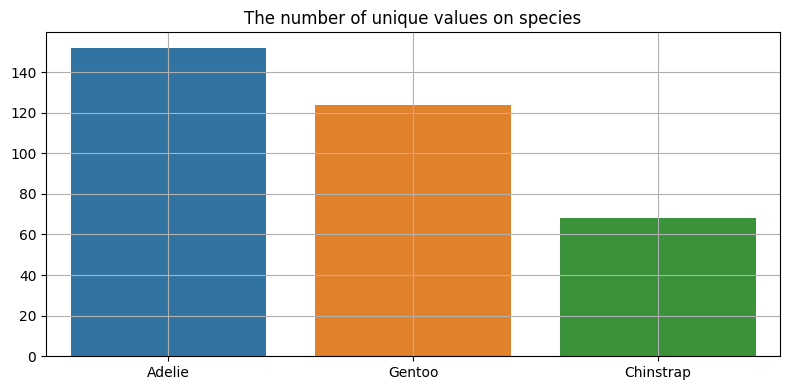

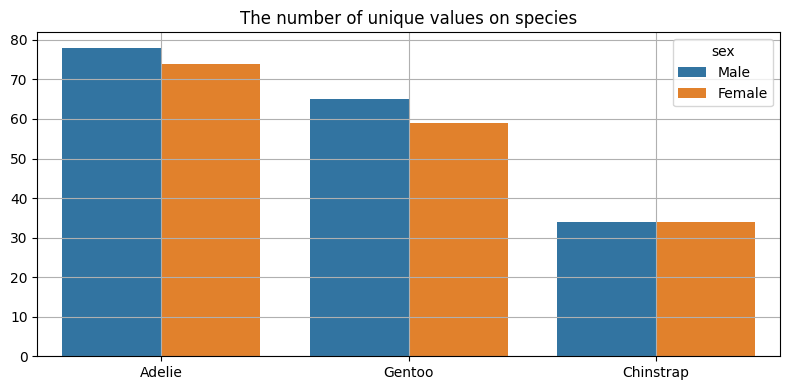

In [ ]:
# calculate the number of unique values on species
barplot(
    data=unique_values(data=dataset, columns="species"), 
    x="species", y="sum", hue="species", title="The number of unique values on species")

# calculate the species grouped based on sex
barplot(
    data=unique_values(data=dataset, columns=["species", "sex"]), 
    x="species", y="sum", hue="sex", title="The number of unique values on species")

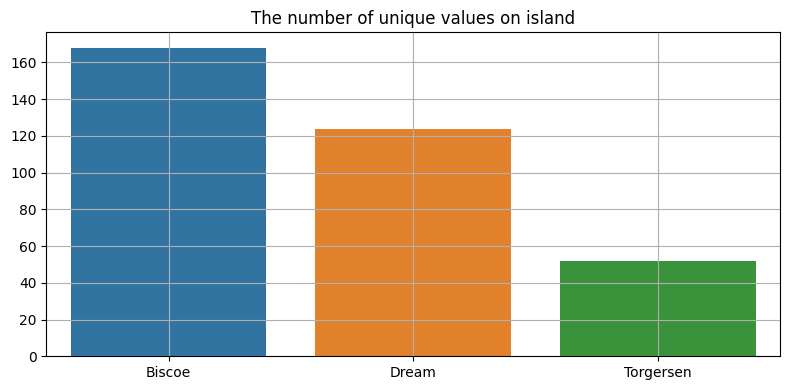

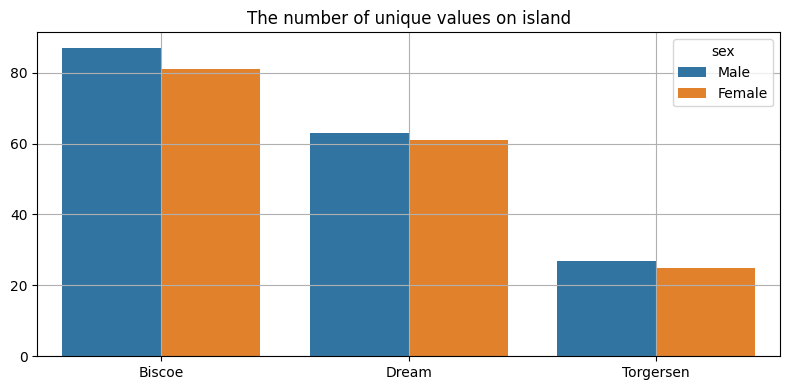

In [8]:
# calculate the number of unique values on island
barplot(
    data=unique_values(data=dataset, columns="island"), 
    x="island", y="sum", hue="island", title="The number of unique values on island")

# calculate the island grouped based on sex
barplot(
    data=unique_values(data=dataset, columns=["island", "sex"]), 
    x="island", y="sum", hue="sex", title="The number of unique values on island"
)

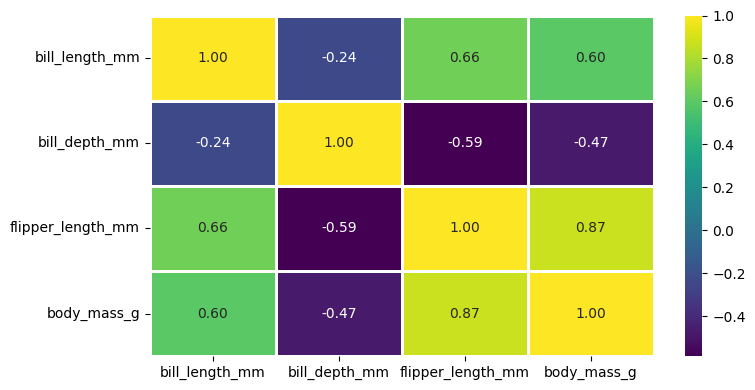

In [9]:
# create heatmap correlation
heatmap(data=dataset.corr(numeric_only=True), width=8, height=4)

#### 3. Data Preprocessing

In [10]:
# set features and labels
x = dataset[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values
y = dataset[["sex"]].values

In [11]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

In [ ]:
# split validation
trainX, testX, trainY, testY = train_test_split(
  scaled, y, train_size=0.7, test_size=0.3, random_state=None, shuffle=True)

In [13]:
# show dimension of data train
print(trainX.shape, trainY.shape)

(240, 4) (240, 1)


In [ ]:
# show dimension of data test
print(testX.shape, testY.shape)

(104, 4) (104, 1)


#### 4. Model of Supervised Learning

- Algorithms C45 

In [15]:
# supervised learning algorithm
result_C45 = DecisionTreeClassifier(criterion="gini", random_state=None).fit(trainX, trainY).predict(testX)

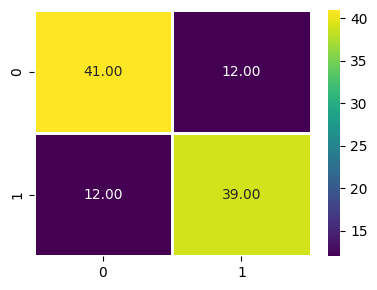

In [16]:
# evaluation models - confusion_matrix
conf_C45 = confusion_matrix(testY, result_C45)

# results confusion matrix
heatmap(data=conf_C45, width=4, height=3)

In [17]:
# evaluation models - classification_report
print(classification_report(testY, result_C45))

              precision    recall  f1-score   support

      Female       0.77      0.77      0.77        53
        Male       0.76      0.76      0.76        51

    accuracy                           0.77       104
   macro avg       0.77      0.77      0.77       104
weighted avg       0.77      0.77      0.77       104

